# Aplicar Modelos Generativos a tareas de Aprendizaje Automático

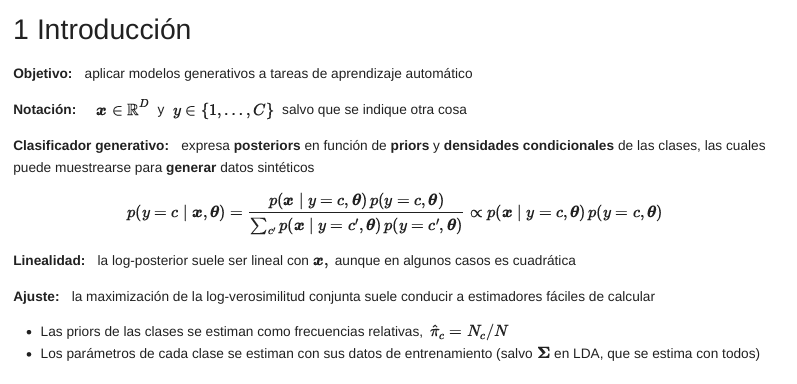

**Los modelos generativos lineales son aquellos que modelan la distribución conjunta de las características y las etiquetas de clase, con el objetivo de aprender cómo se generan los datos dentro de cada clase. Estos modelos no solo se centran en la asignación de una clase a una observación, sino también en modelar cómo los datos de cada clase se distribuyen.**

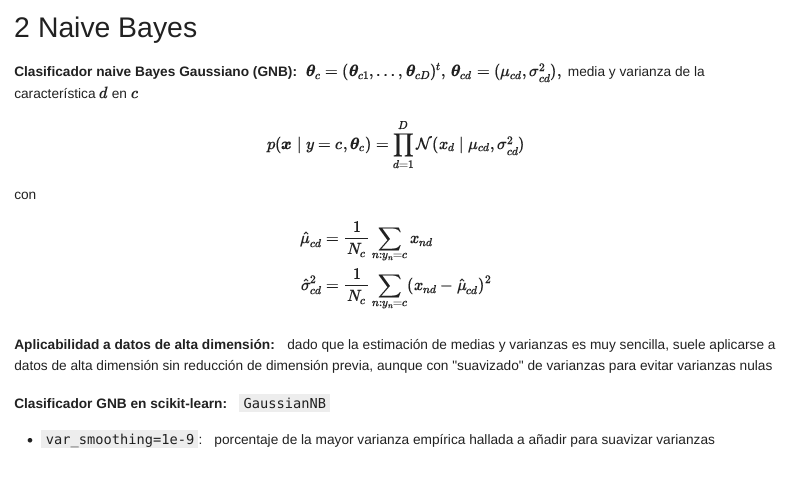

Naive Bayes es un clasificador probabilístico que utiliza el teorema de Bayes para predecir la clase de una observación, asumiendo que las características son independientes entre sí, dadas las clases. El clasificador calcula la probabilidad de cada clase basándose en la distribución de las características en los datos de entrenamiento, y asigna la clase con la probabilidad más alta. En el caso del clasificador Gaussiano (GNB), se asume que cada característica sigue una distribución normal dentro de cada clase.

# Aplicación de Naive Bayes

Ejemplo con digits

In [ ]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, ShuffleSplit, RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
X, y = load_digits(return_X_y=True)
X = X.astype(np.float32) / 16.0; test_size = 0.1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=True, random_state=23)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1617, 64) (1617,) (180, 64) (180,)


In [ ]:
from scipy.stats import loguniform; import time; start = time.time()
clf = GaussianNB()
G = {'var_smoothing': loguniform(1e-9, 1e-1)}
splitter = ShuffleSplit(n_splits=5, test_size=0.1, random_state=23)
RS = RandomizedSearchCV(clf, G, n_iter=1000, scoring='accuracy', n_jobs=-1, cv=splitter, pre_dispatch=32)
acc = RS.fit(X_train, y_train).score(X_test, y_test)
print(f"Precisión: {acc:.2%} con {RS.best_params_['var_smoothing']:.4f}")
print('Tiempo (hh:mm:ss):', time.strftime('%H:%M:%S', time.gmtime(time.time() - start)))

Precisión: 93.33% con 0.0541
Tiempo (hh:mm:ss): 00:00:27


Este código entrena el clasificador Naive Bayes Gaussiano (GaussianNB) para predecir las clases (los dígitos manuscritos) de los datos de entrada basados en las características de las imágenes. Concretamente, el objetivo es optimizar el parámetro var_smoothing para mejorar la precisión del clasificador en los datos de prueba.

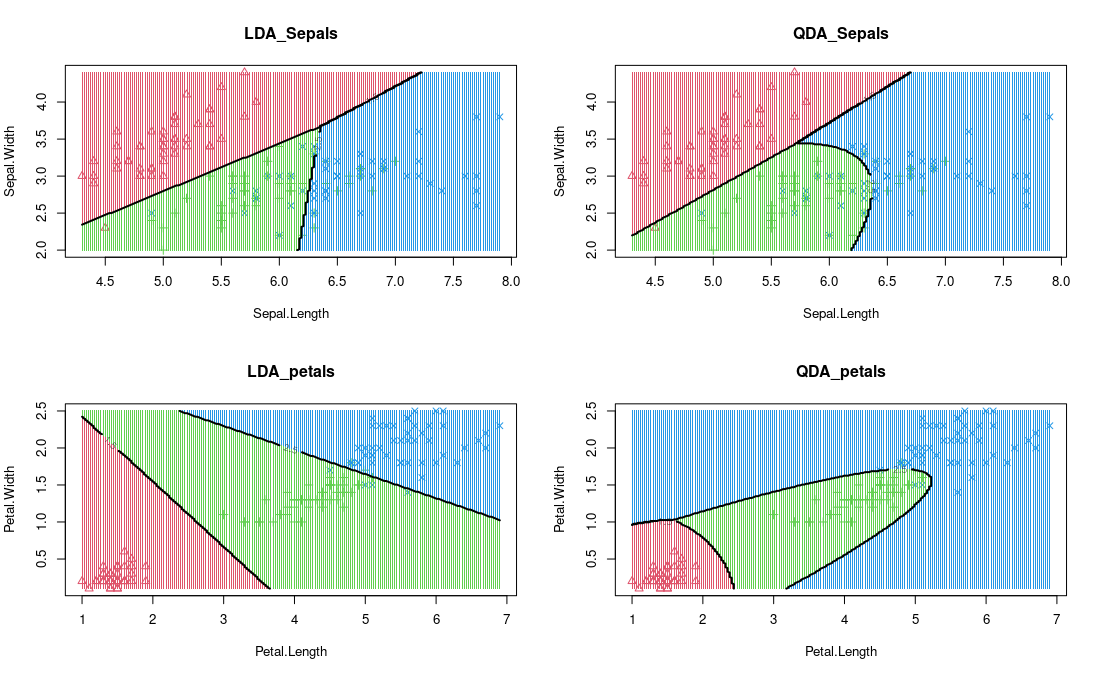

# **LDA VS QDA**

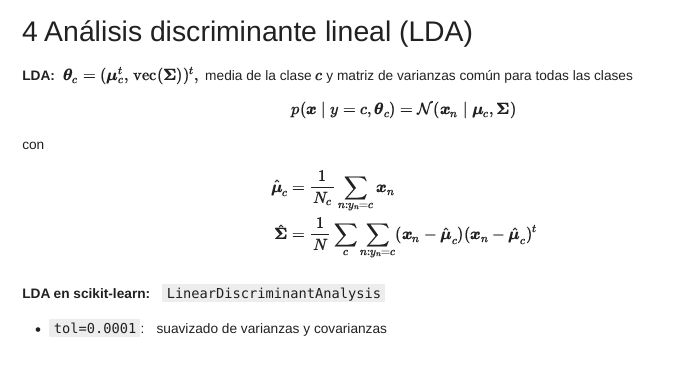

El Análisis Discriminante Lineal (LDA) es un clasificador generativo que asume que los datos de cada clase siguen una distribución normal con medias diferentes para cada clase y una matriz de covarianzas común para todas las clases. Estima las medias y la matriz de covarianzas a partir de los datos de entrenamiento. LDA genera una frontera de decisión lineal y se utiliza para clasificación, especialmente en problemas de alta dimensionalidad, donde a menudo se aplica reducción de dimensionalidad previa (como PCA). En resumen, LDA asume normalidad y covarianzas comunes, lo que lleva a decisiones lineales entre clases.

Usamos LDA cuando:

1.   Suposición de covarianzas comunes: LDA asume que todas las clases tienen la misma matriz de covarianzas. Si esta suposición es válida para los datos, LDA será más eficiente y adecuado.
2.   Espacios de características con relación lineal: LDA genera una frontera de decisión lineal. Si las clases se pueden separar de manera lineal en el espacio de características, LDA es ideal.
3.   Datos de alta dimensión y menor tamaño de muestra: LDA tiende a ser más robusto con menos muestras cuando las clases tienen covarianzas similares.



# Aplicación de LDA

# Ejemplo con digits

In [ ]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, ShuffleSplit, RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
X, y = load_digits(return_X_y=True)
X = X.astype(np.float32) / 16.0; test_size = 0.1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=True, random_state=23)
K = 30
pca = PCA(n_components=K)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1617, 30) (1617,) (180, 30) (180,)


Para ajustar LDA debemos de hacer uso del cálculo de la k óptima mediante la técnica de PCA.

In [ ]:
from scipy.stats import loguniform
import time; start = time.time()
clf = LinearDiscriminantAnalysis()
G = {'tol': loguniform(1e-9, 1e-1)}
splitter = ShuffleSplit(n_splits=2, test_size=0.1, random_state=23)
RS = RandomizedSearchCV(clf, G, n_iter=10, scoring='accuracy', n_jobs=-1, cv=splitter, pre_dispatch=32)
acc = RS.fit(X_train, y_train).score(X_test, y_test)
print(f"Precisión: {acc:.2%} con {RS.best_params_['tol']:.4f}")
print('Tiempo (hh:mm:ss):', time.strftime('%H:%M:%S', time.gmtime(time.time() - start)))

Precisión: 95.00% con 0.0000
Tiempo (hh:mm:ss): 00:00:04


# Ejemplo con MNIST

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, ShuffleSplit, RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import fetch_openml

In [ ]:
X, y = fetch_openml(data_id=554, return_X_y=True, as_frame=False, parser='liac-arff')
X /= 255.0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, shuffle=False)

In [ ]:
K = 450
pca = PCA(n_components=K)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 450) (60000,) (10000, 450) (10000,)


In [ ]:
from scipy.stats import loguniform
import time; start = time.time()
clf = LinearDiscriminantAnalysis()
G = {'tol': loguniform(1e-9, 1e-1)}
splitter = ShuffleSplit(n_splits=2, test_size=0.1, random_state=23)
RS = RandomizedSearchCV(clf, G, n_iter=10, scoring='accuracy', n_jobs=-1, cv=splitter, pre_dispatch=32)
acc = RS.fit(X_train, y_train).score(X_test, y_test)
print(f"Precisión: {acc:.2%} con {RS.best_params_['tol']:.4f}")
print('Tiempo (hh:mm:ss):', time.strftime('%H:%M:%S', time.gmtime(time.time() - start)))

Precisión: 87.28% con 0.0000
Tiempo (hh:mm:ss): 00:02:24


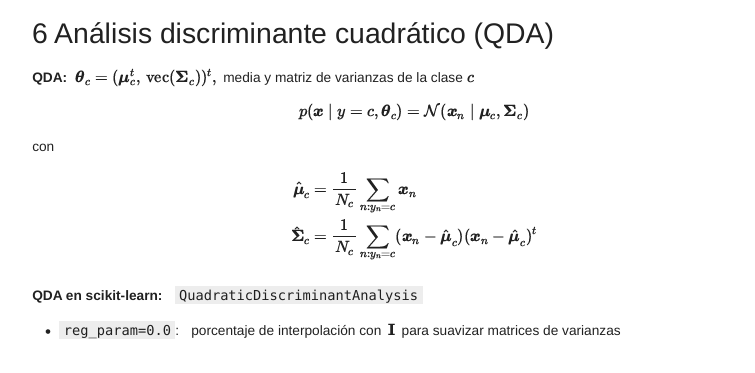

QDA (Análisis Discriminante Cuadrático) es un clasificador generativo que se utiliza para la clasificación en problemas donde se asume que los datos de cada clase provienen de una distribución normal multivariante, pero a diferencia de LDA, QDA no asume que las clases tengan la misma matriz de covarianzas. En cambio, cada clase tiene su propia matriz de covarianzas, lo que le permite modelar clases con diferentes dispersión y forma.

Usamos QDA cuando:

1.   Covarianzas diferentes por clase: QDA permite que cada clase tenga su propia matriz de covarianzas. Esto es útil si las clases tienen formas de distribución muy diferentes, por ejemplo, si las distribuciones de cada clase no son esféricas o no tienen la misma dispersión.
2.   Distribuciones no lineales: QDA puede manejar fronteras de decisión no lineales debido a que el modelo no asume que las clases tienen covarianzas comunes. Esto es útil cuando las clases tienen estructuras más complejas y no pueden separarse de manera lineal.
3.   Mayor flexibilidad a cambio de mayor complejidad: QDA es más flexible pero también más propenso a sobreajustarse si hay pocos datos o muchas características. Esto se debe a que el modelo tiene más parámetros que LDA.



# APLICACIÓN DE QDA

# Ejemplo con digits

In [ ]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, ShuffleSplit, RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
X, y = load_digits(return_X_y=True)
X = X.astype(np.float32) / 16.0; test_size = 0.1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=True, random_state=23)
K = 30
pca = PCA(n_components=K)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1617, 30) (1617,) (180, 30) (180,)


In [ ]:
from scipy.stats import loguniform
import time
start = time.time()
clf = QuadraticDiscriminantAnalysis()
G = {'reg_param': loguniform(1e-9, 1e-1)}
splitter = ShuffleSplit(n_splits=2, test_size=0.1, random_state=23)
RS = RandomizedSearchCV(clf, G, n_iter=10, scoring='accuracy', n_jobs=-1, cv=splitter, pre_dispatch=32)
acc = RS.fit(X_train, y_train).score(X_test, y_test)
print(f"Precisión: {acc:.2%} con {RS.best_params_['reg_param']:.4f}")
print('Tiempo (hh:mm:ss):', time.strftime('%H:%M:%S', time.gmtime(time.time() - start)))

Precisión: 98.89% con 0.0467
Tiempo (hh:mm:ss): 00:00:02


# Ejemplo con MNIST

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, ShuffleSplit, RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import fetch_openml

In [ ]:
X, y = fetch_openml(data_id=554, return_X_y=True, as_frame=False, parser='liac-arff')
X /= 255.0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, shuffle=False)

In [ ]:
K = 450
pca = PCA(n_components=K)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 450) (60000,) (10000, 450) (10000,)


In [ ]:
from scipy.stats import loguniform
import time
start = time.time()
clf = QuadraticDiscriminantAnalysis()
G = {'reg_param': loguniform(1e-9, 1e-1)}
splitter = ShuffleSplit(n_splits=2, test_size=0.1, random_state=23)
RS = RandomizedSearchCV(clf, G, n_iter=10, scoring='accuracy', n_jobs=-1, cv=splitter, pre_dispatch=32)
acc = RS.fit(X_train, y_train).score(X_test, y_test)
print(f"Precisión: {acc:.2%} con {RS.best_params_['reg_param']:.4f}")
print('Tiempo (hh:mm:ss):', time.strftime('%H:%M:%S', time.gmtime(time.time() - start)))

Precisión: 95.82% con 0.0420
Tiempo (hh:mm:ss): 00:02:24
